# Demo: Characterizing neural oscillation waveform

Scott Cole

12 March 2016

In our paper (link TBD) we argue that characteristics of the neural oscillation waveform carries information about the underlying neural activity that cannot be obtained with traditional Fourier-based methods.

This notebook provides a demonstration of this library by characterizing the waveform shape of simulated neural oscillations.

Dependencies:
* [tools](https://github.com/srcole/tools)


Outline
1. Load simulated neural oscillations


**Standard Imports**

In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Load and visualize data

In [24]:
lfps = np.load('./lfps.npy')
N = len(lfps)
S = len(lfps[0])
dt = .001
t = np.arange(0,S*dt,dt)
Smax = 1000

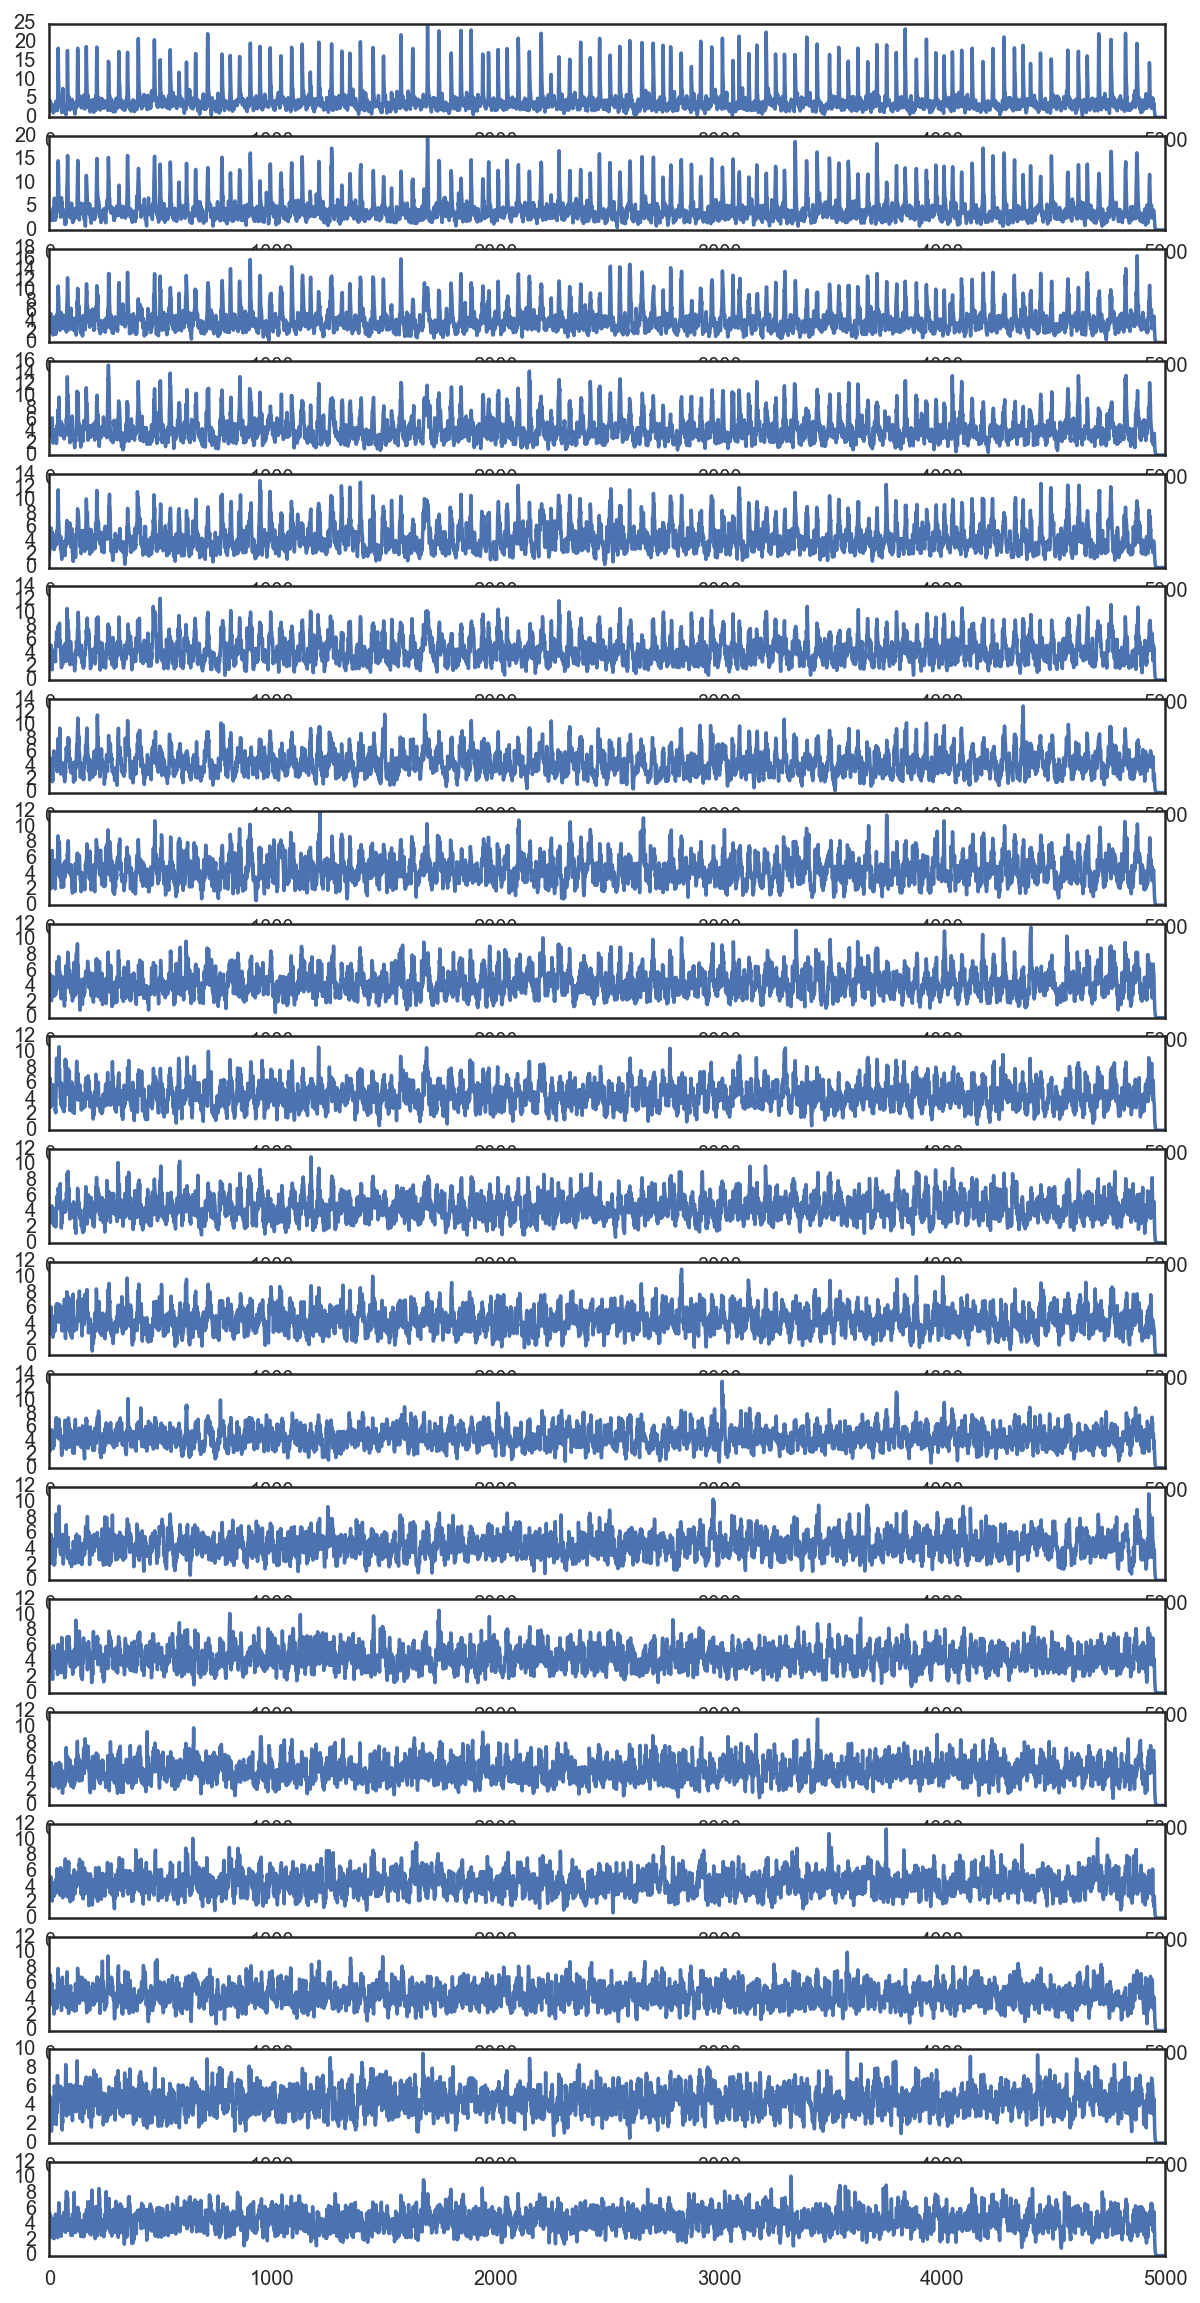

In [25]:
plt.figure(figsize=(10,20))
for n in range(N):
    plt.subplot(N,1,n+1)
    plt.plot(lfps[n])

# 4. Shape

In [9]:
# Quantify shape metric as a function of gaussian std
from misshapen.shape import findpt, ex_sharp

# Shape parameters
boundaryS = 100
widthS = 5
ampPC = 0

# Identify peaks and troughs
pkB, trB = findpt(simres[0]['lfp'], flo, f_lopass = None, Fs = 1/dt, boundary = boundaryS)
pkD, trD = findpt(simres[1]['lfp'], flo, f_lopass = None, Fs = 1/dt, boundary = boundaryS)

spPB = ex_sharp(simres[0]['lfp'], pkB, widthS,ampPC=ampPC, Fs=1/dt, fosc = flo)
spTB = ex_sharp(simres[0]['lfp'], trB, widthS,ampPC=ampPC, Fs=1/dt, fosc = flo)
spPD = ex_sharp(simres[1]['lfp'], pkB, widthS,ampPC=ampPC, Fs=1/dt, fosc = flo)
spTD = ex_sharp(simres[1]['lfp'], trB, widthS,ampPC=ampPC, Fs=1/dt, fosc = flo)

Ttest_indResult(statistic=14.738828509804893, pvalue=1.007180589461218e-33)
Ttest_indResult(statistic=1.779281262249063, pvalue=0.076719988368533568)


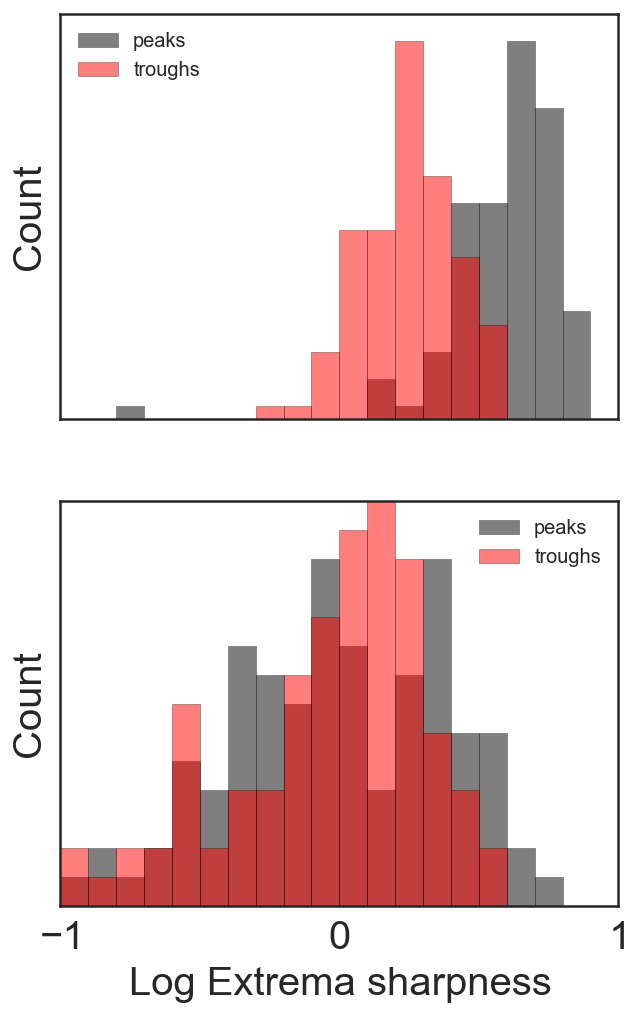

In [10]:
plt.figure(figsize=(5,8))
plt.subplot(2,1,1)
Nbins=np.arange(-1,1,.1)
plt.hist(np.log10(spPB),Nbins,color='k',label='peaks',alpha=0.5)
plt.hist(np.log10(spTB),Nbins,color='r',label='troughs',alpha=0.5)
plt.ylabel('Count',size=20)
plt.legend(loc='best')
ax1 = plt.gca()
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), visible=False)

plt.subplot(2,1,2)
plt.hist(np.log10(spPD),Nbins,color='k',label='peaks',alpha=0.5)
plt.hist(np.log10(spTD),Nbins,color='r',label='troughs',alpha=0.5)
plt.xlabel('Log Extrema sharpness',size=20)
plt.xticks(np.arange(-1,2,1),size=20)
plt.ylabel('Count',size=20)
plt.legend(loc='best')
ax1 = plt.gca()
plt.setp(ax1.get_yticklabels(), visible=False)

print sp.stats.ttest_ind(spPB,spTB)
print sp.stats.ttest_ind(spPD,spTD)

figname = 'F1_peak-trough-sharpness'
plt.savefig('C:/Users/Scott/Google Drive/Voytek/Voytek Lab Shared resources/manuscripts/PD/feb2016fig/'+figname + '.png')

# 5. Simulation methodology figure

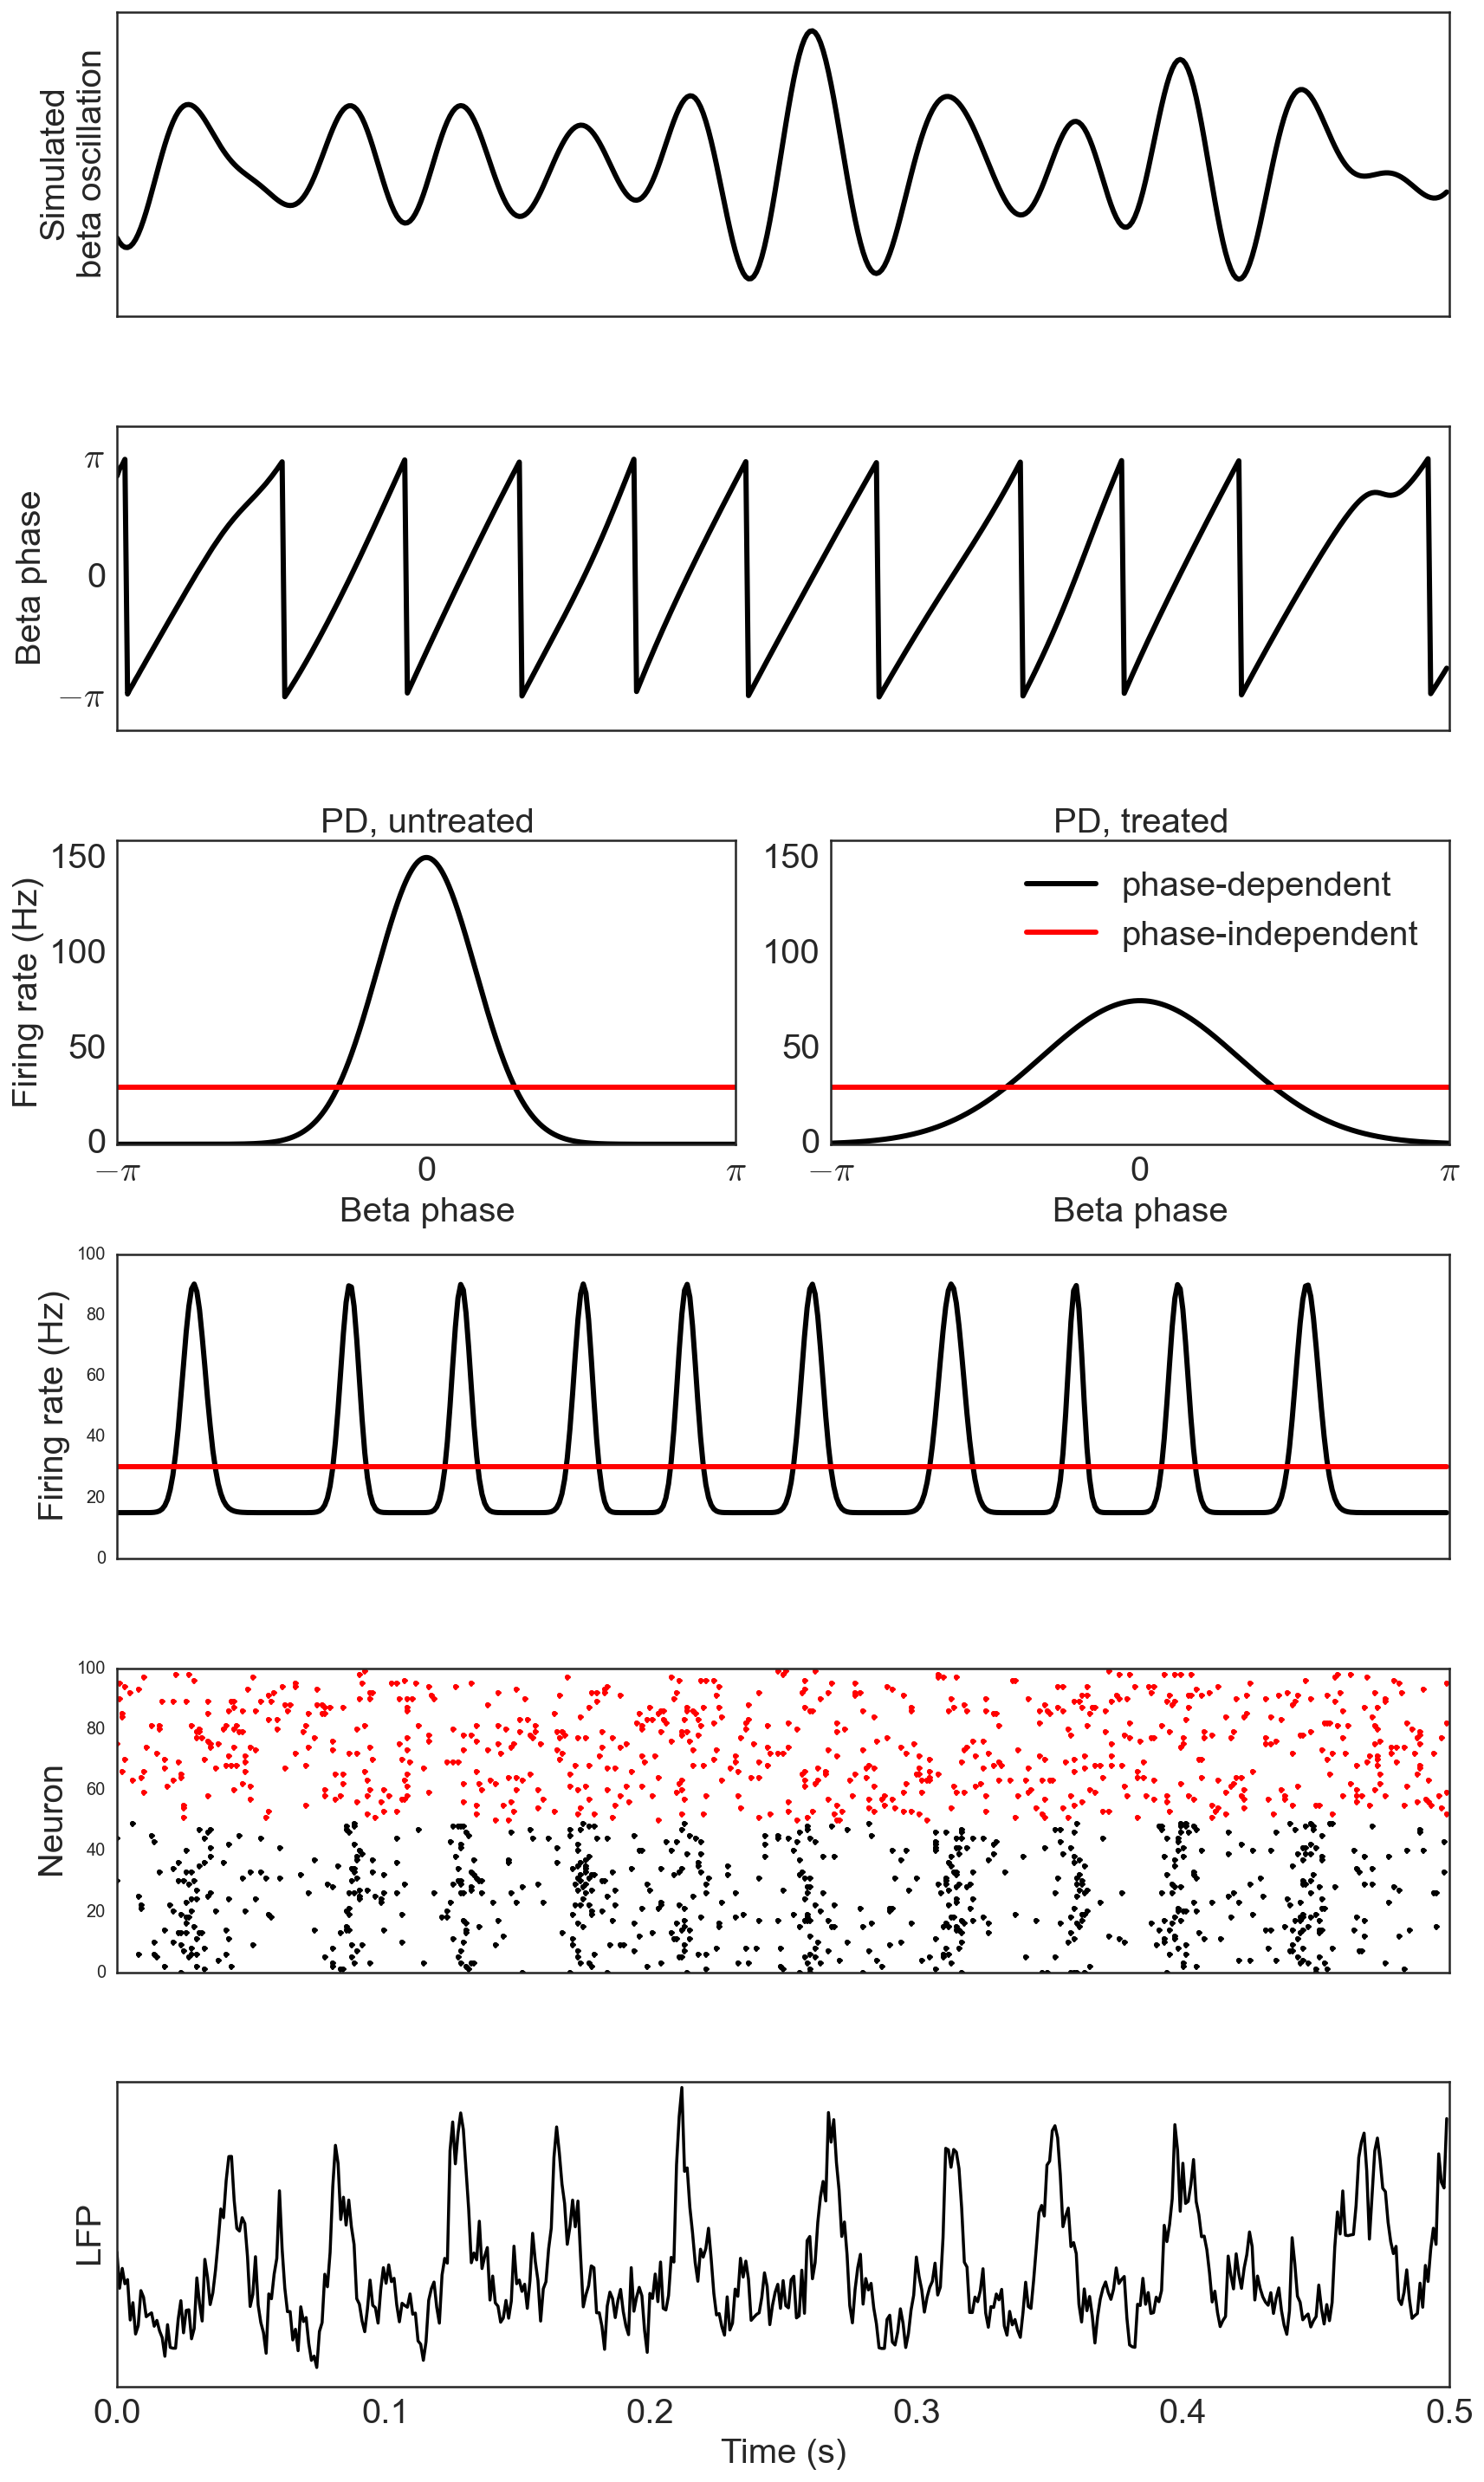

In [11]:
# Bandpassed white noise
tmax = 500
plt.figure(figsize=(12,20))
plt.subplot(6,1,1)
plt.plot(t[:tmax],simwave[:tmax] + ax1.get_ylim()[1]/2,'k',linewidth=3)
ax1 = plt.gca()
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), visible=False)
plt.ylabel('Simulated\nbeta oscillation',size=20)
plt.tight_layout()

# Beta phase
plt.subplot(6,1,2)
plt.plot(t[:tmax],simphase1[:tmax],'k',linewidth=3)
ax1 = plt.gca()
plt.setp(ax1.get_xticklabels(), visible=False)
plt.yticks(np.arange(-np.pi,np.pi*1.1,np.pi),['$-\pi$','0','$\pi$'],size=20)
plt.ylabel('Beta phase', size=20)

# Phase-to-FR transforms
phaaxis = np.arange(-np.pi,np.pi+.01,.01)
import matplotlib.mlab as mlab
untreatT = mlab.normpdf(phaaxis,0,sfc_std[0])
untreatT = untreatT / np.mean(untreatT) * fr
treatT = mlab.normpdf(phaaxis,0,sfc_std[1])
treatT = treatT / np.mean(treatT) * fr

plt.subplot(6,2,5)
plt.plot(phaaxis,untreatT,'k',linewidth=3,label='phase-dependent')
plt.plot(phaaxis,np.ones(len(phaaxis))*fr,'r',linewidth=3,label='phase-independent')
plt.xlabel('Beta phase',size=20)
plt.ylabel('Firing rate (Hz)',size=20)
plt.yticks(np.arange(0,200,50),size=20)
plt.xticks(np.arange(-np.pi,np.pi*1.1,np.pi),['$-\pi$','0','$\pi$'],size=20)
plt.title('PD, untreated',size=20)
plt.ylim((0,160))
plt.xlim((-np.pi,np.pi))

plt.subplot(6,2,6)
plt.plot(phaaxis,treatT,'k',linewidth=3,label='phase-dependent')
plt.plot(phaaxis,np.ones(len(phaaxis))*fr,'r',linewidth=3,label='phase-independent')
plt.legend(loc='best',fontsize=20)
plt.xlabel('Beta phase',size=20)
plt.yticks(np.arange(0,200,50),size=20)
plt.xticks(np.arange(-np.pi,np.pi*1.1,np.pi),['$-\pi$','0','$\pi$'],size=20)
plt.title('PD, treated',size=20)
plt.ylim((0,160))
plt.xlim((-np.pi,np.pi))

# Firing rate
plt.subplot(6,1,4)
plt.plot(t[:tmax],simres[0]['fr_t'][:tmax],'k',linewidth=3,label='phase-dependent')
plt.plot(t[:tmax],np.ones(len(t[:tmax]))*fr,'r',linewidth=3,label='phase-independent')
plt.ylabel('Firing rate (Hz)',size=20)
ax1 = plt.gca()
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylim((0,100))

# Spiking
neup = simres[0]['rasterN'][simres[0]['rasterS']<tmax*dt]
spksp = simres[0]['rasterS'][simres[0]['rasterS']<tmax*dt]

plt.subplot(6,1,5)
plt.plot(spksp[neup<sfc_neu*nNeu],neup[neup<sfc_neu*nNeu],'k.',label='phase-dependent')
plt.plot(spksp[neup>=sfc_neu*nNeu],neup[neup>=sfc_neu*nNeu],'r.',label='phase-independent')
plt.ylabel('Neuron',size=20)
ax1 = plt.gca()
plt.setp(ax1.get_xticklabels(), visible=False)

# LFP
plt.subplot(6,1,6)
plt.plot(t[:tmax],simres[0]['lfp'][:tmax],'k-')
plt.ylabel('LFP',size=20)
ax1 = plt.gca()
plt.setp(ax1.get_yticklabels(), visible=False)
plt.xticks(size=20)
plt.xlabel('Time (s)',size=20)

plt.tight_layout()


figname = 'SFa_simmethods'
plt.savefig('C:/Users/Scott/Google Drive/Voytek/Voytek Lab Shared resources/manuscripts/PD/feb2016fig/'+figname + '.png')

# 6. PSP stacking

In [12]:
np.random.seed(0)
T = .2
dt = .001
fr = 10
sfc_fr = .8
nNeu = 100
t = np.arange(0,T,dt)

simphase2, _ = simphase(T, flo, dt=dt, returnwave=True)
frt_sync = pha2r(simphase2, 'gauss', sfc_fr, fr, normstd = .2)
nrns_sync = neurons.Spikes(nNeu, T, dt=dt, seed=np.random.randint(10000))
spkstemp = nrns_sync.poisson(frt_sync)
rasterN_sync, rasterS_sync = util.to_spiketimes(nrns_sync.times,spkstemp)
spklist_sync = np.sum(spkstemp,axis=1)

frt_nonsync = pha2r(simphase2, 'gauss', sfc_fr, fr, normstd = 1)
nrns_nonsync = neurons.Spikes(nNeu, T, dt=dt, seed=np.random.randint(10000))
spkstemp = nrns_nonsync.poisson(frt_nonsync)
rasterN_nonsync, rasterS_nonsync = util.to_spiketimes(nrns_nonsync.times,spkstemp)
spklist_nonsync = np.sum(spkstemp,axis=1)

In [13]:
#Create LFP

#Create psp
Tpsp, gmax, tau_rise, tau_decay = 20, 1, .3, 2
t_dexp = np.arange(Tpsp)
psp = gmax * (np.exp(-t_dexp/tau_decay) - np.exp(-t_dexp/tau_rise))

# Create LFPs
lfp_sync = np.convolve(spklist_sync, psp, mode='full')
lfp_nonsync = np.convolve(spklist_nonsync, psp, mode='full')

In [14]:
# Calculate stacking psp functions
ntp = len(t)
pspstack_sync = np.zeros(ntp,dtype=object)
pspstack_nonsync = np.zeros(ntp,dtype=object)
for tp in range(ntp):
    filt = np.zeros(ntp)
    filt[tp] = 1
    pspstack_sync[tp] = np.convolve(spklist_sync*filt, psp, mode='full')
    pspstack_nonsync[tp] = np.convolve(spklist_nonsync*filt, psp, mode='full')

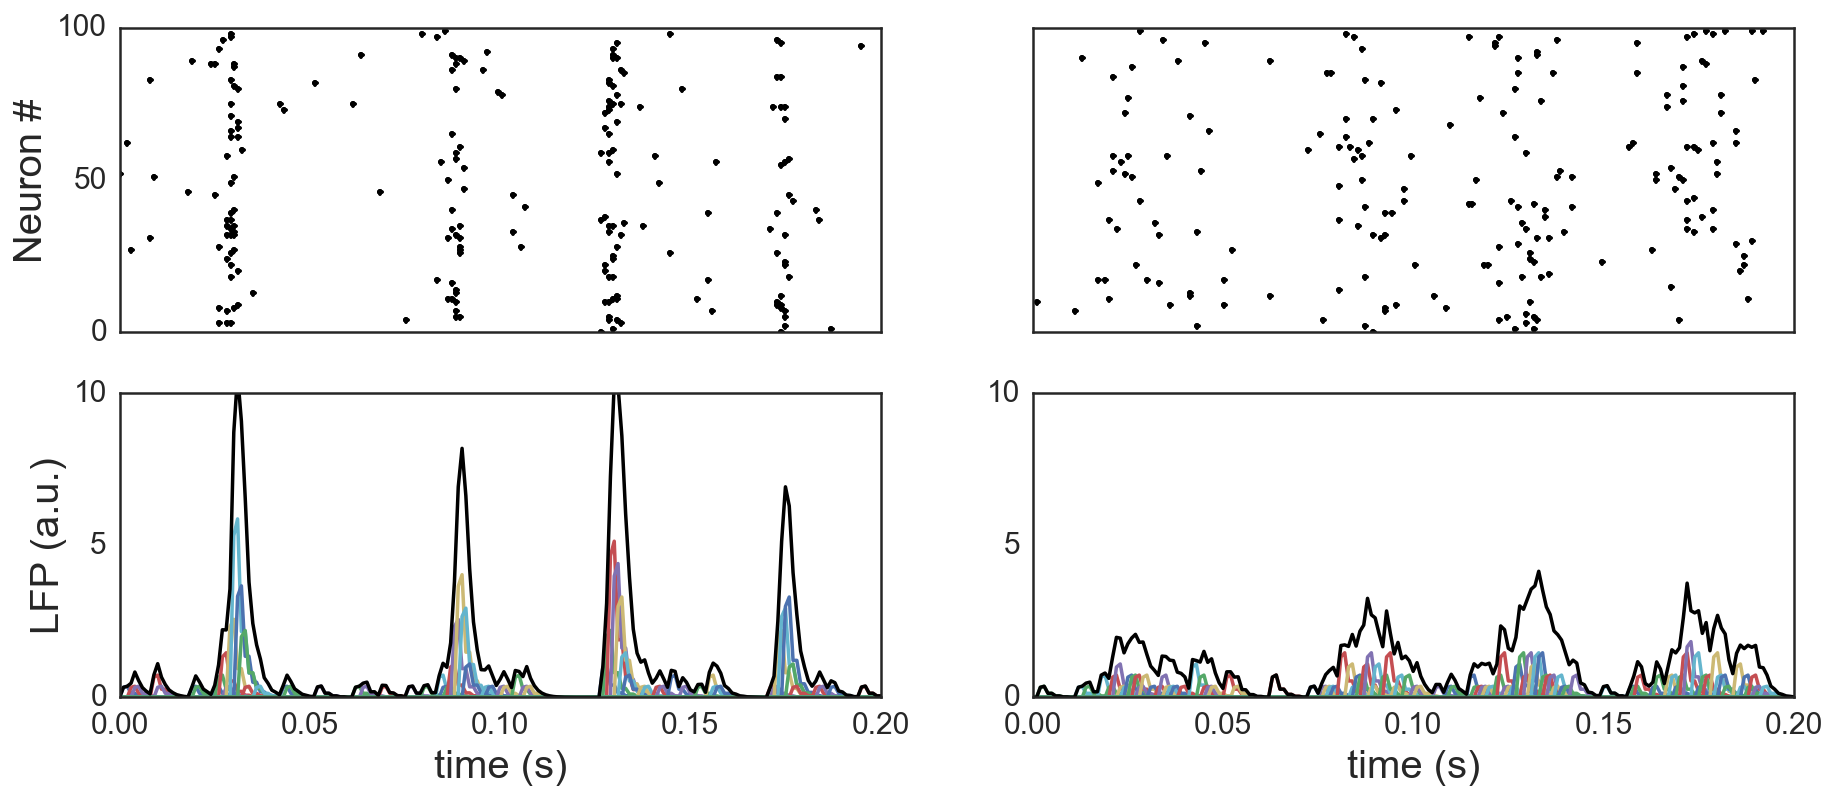

In [15]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
plt.plot(rasterS_sync, rasterN_sync,'k.')
ax1 = plt.gca()
plt.setp(ax1.get_xticklabels(), visible=False)
plt.yticks([0,50,100],size=15)
plt.ylabel('Neuron #',size=20)

plt.subplot(2,2,2)
plt.plot(rasterS_nonsync, rasterN_nonsync,'k.')
ax1 = plt.gca()
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), visible=False)

plt.subplot(2,2,3)
for tp in range(ntp):
    plt.plot(np.arange(0,len(lfp_sync)*dt,dt), pspstack_sync[tp])
plt.plot(np.arange(0,len(lfp_sync)*dt,dt),lfp_sync,'k')
plt.xlim((0,T))
plt.yticks([0,5,10],size=15)
plt.ylabel('LFP (a.u.)',size=20)
plt.xticks([0,.05,.1,.15,.2],size=15)
plt.xlabel('time (s)',size=20)
plt.ylim((0,10))

plt.subplot(2,2,4)
for tp in range(ntp):
    plt.plot(np.arange(0,len(lfp_sync)*dt,dt), pspstack_nonsync[tp])
plt.plot(np.arange(0,len(lfp_nonsync)*dt,dt),lfp_nonsync,'k')
plt.xlim((0,T))
plt.ylim((0,10))

ax1 = plt.gca()
plt.yticks([0,5,10],size=15)
plt.xticks([0,.05,.1,.15,.2],size=15)
plt.xlabel('time (s)',size=20)

figname = 'F1_pspstack'
plt.savefig('C:/Users/Scott/Google Drive/Voytek/Voytek Lab Shared resources/manuscripts/PD/feb2016fig/'+figname + '.png')